In [ ]:
import torch as t
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100, 1]) torch.Size([100, 1])


### Linear Regression with Noise

torch.Size([100, 1]) torch.Size([100, 1])
epoch: 10, loss = 4482.9849
epoch: 20, loss = 3340.9602
epoch: 30, loss = 2515.2136
epoch: 40, loss = 1917.4866
epoch: 50, loss = 1484.3655
epoch: 60, loss = 1170.2191
epoch: 70, loss = 942.1646
epoch: 80, loss = 776.4730
epoch: 90, loss = 656.0002
epoch: 100, loss = 568.3451


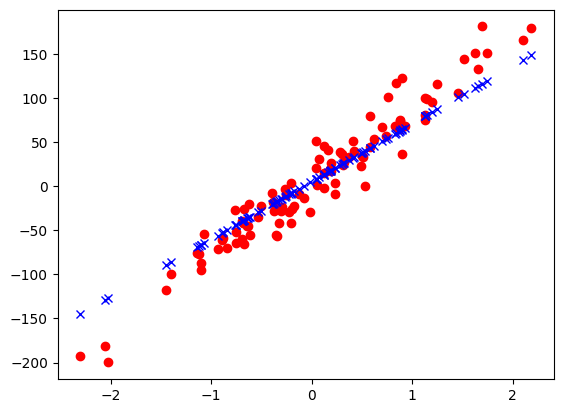

In [14]:
#Prepare data
#Generates random regression problem, outputs input samples and their corresponding output values
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1) 

X = t.from_numpy(X_numpy.astype(np.float32))
Y = t.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) #reshape to match X tensor
print(X.shape, Y.shape)

n_samples, n_features = X.shape

#Model
input_size = n_features
output_size = 1 #one value for each sample
model = nn.Linear(input_size, output_size)

#Loss and Optimiser
learning_rate = 0.01
l = nn.MSELoss()
optimiser = t.optim.SGD(model.parameters(), lr = learning_rate)

#Training
iterations = 100
for epoch in range(iterations):
    #Forward pass and loss
    y_predicted = model(X)
    loss = l(y_predicted, Y)    
    
    #Backward pass
    loss.backward() #sums up gradients into .grad attribute of X

    #Update
    optimiser.step()
    optimiser.zero_grad()

    if (epoch + 1) % 10 ==0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy() #prevent operation from being added to computational graph
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted,  'bx')
plt.show()

### Logistic Regression

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Prepare date

#Binary classification problem
bc = datasets.load_breast_cancer()
X, Y = bc.data, bc.target
#X has 569 rows and 30 columns
#569 samples, each with 30 different features 
n_samples, n_features = X.shape 

#Split data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)#test size 20%
#Scale- Recommended for logistic regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = t.from_numpy(X_train.astype(np.float32))
X_test = t.from_numpy(X_test.astype(np.float32))
Y_train = t.from_numpy(Y_train.astype(np.float32))
Y_test = t.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1) #reshape to have match X, column vector
Y_test = Y_test.view(Y_test.shape[0], 1)

#Model
#f(x) = wx+b, sigmoid function applied at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1) #Define layer using built in linear layer. Takes
        #input size and output size- want only one output

    def forward(self, x):
        y_predicted = t.sigmoid(self.linear(x))
        return y_predicted 
    
model = LogisticRegression(n_features)

#Loss and Optimiser
learning_rate = 0.01
criterion = nn.BCELoss() #Binary Cross entropy loss. Used for logistic regression
optimiser = t.optim.SGD(model.parameters(), lr=learning_rate)

#Training Loop
iterations = 100
for epoch in range(iterations):
    # - Forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, Y_train)

    # - Backward pass
    loss.backward()

    # - Update
    optimiser.step()
    optimiser.zero_grad()

    if (epoch + 1) % 10 ==0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
     
with t.no_grad(): #don't track gradient
    y_predicted = model(X_test)
    y_predicted_classes = y_predicted.round() #sigmoid gives value between zero and one
    accuracy = y_predicted_classes.eq(Y_test).sum()/float(Y_test.shape[0])
    print(f'accuracy = {accuracy:.4f}')
    print(model)



epoch: 10, loss = 0.5733
epoch: 20, loss = 0.4824
epoch: 30, loss = 0.4221
epoch: 40, loss = 0.3789
epoch: 50, loss = 0.3464
epoch: 60, loss = 0.3207
epoch: 70, loss = 0.2999
epoch: 80, loss = 0.2826
epoch: 90, loss = 0.2679
epoch: 100, loss = 0.2553
accuracy = 0.8947
LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)
